In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [63]:
data_file = "conso.txt"

In [64]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [65]:
text='test'
filename='text.txt'
#save_text(filename)

In [66]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [67]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


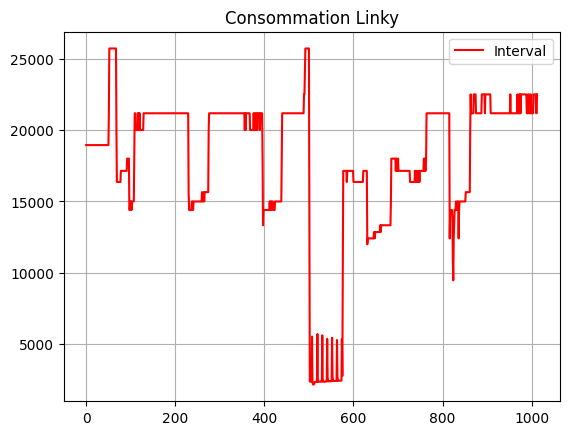

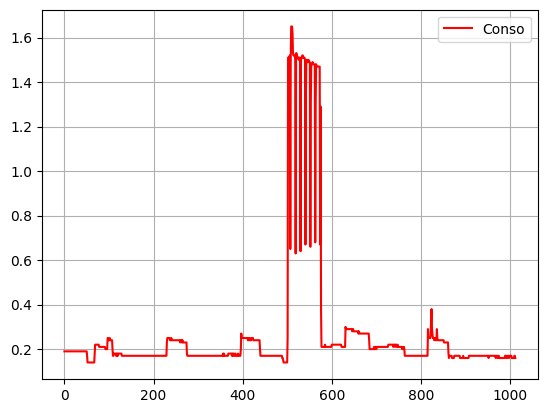

In [68]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [69]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [70]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126886 entries, 0 to 126885
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  126886 non-null  int64  
 1   kWh       126886 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [71]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
126881,33818,0.11
126882,33775,0.11
126883,33619,0.11
126884,28486,0.13


<Axes: >

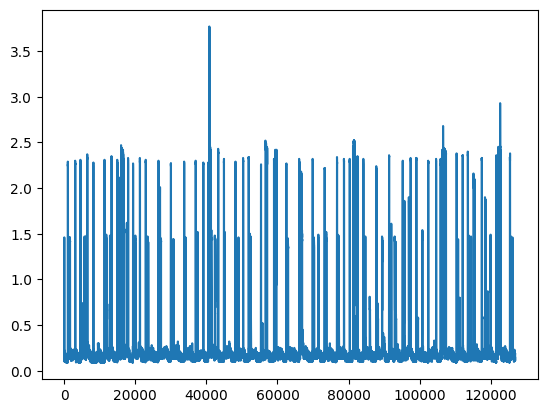

In [72]:
conso_data['kWh'].plot()

In [73]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
126881,33818,0.11,33.818,106.452185,2993837024
126882,33775,0.11,33.775,106.587713,2993870799
126883,33619,0.11,33.619,107.082305,2993904418
126884,28486,0.13,28.486,126.377870,2993932904


In [74]:
# index dernier echantillon
l=len(conso_data)-1
l

126885

In [75]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2993958254000

In [76]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 40, 41, 438)

In [77]:
old

False

In [78]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126886 entries, 0 to 126885
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   126886 non-null  int64         
 1   kWh        126886 non-null  float64       
 2   sec        126886 non-null  float64       
 3   Wh         126886 non-null  float64       
 4   cumul(ms)  126886 non-null  int64         
 5   dates      126886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 5.8 MB


In [79]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:41:07.289438,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:41:33.532438,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:41:59.417438,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:42:25.171438,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:42:50.945438,07/03/2024
...,...,...,...,...,...,...,...
126881,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024
126882,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024
126883,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024
126884,28486,0.13,28.486,126.377870,2993932904,2024-04-10 17:19:33.904438,10/04/2024


In [80]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:41:07.289438   
 
          days  
 0  07/03/2024  ,
         Interval   kWh    sec          Wh   cumul(ms)  \
 126885     25350  0.14  25.35  142.011834  2993958254   
 
                             dates        days  
 126885 2024-04-10 17:19:59.254438  10/04/2024  )

In [81]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('10/04/2024', 4, 2024)

In [82]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
124541,29818,0.12,29.818,120.732443,2931569438,2024-04-10 00:00:10.438438,10/04/2024
124542,30479,0.12,30.479,118.114111,2931599917,2024-04-10 00:00:40.917438,10/04/2024
124543,34231,0.10,34.231,105.167830,2931634148,2024-04-10 00:01:15.148438,10/04/2024
124544,35979,0.10,35.979,100.058367,2931670127,2024-04-10 00:01:51.127438,10/04/2024
124545,36120,0.10,36.120,99.667774,2931706247,2024-04-10 00:02:27.247438,10/04/2024
...,...,...,...,...,...,...,...
126881,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024
126882,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024
126883,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024
126884,28486,0.13,28.486,126.377870,2993932904,2024-04-10 17:19:33.904438,10/04/2024


In [83]:
day

'10/04/2024'

In [84]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:41:07.289438,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:41:33.532438,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:41:59.417438,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:42:25.171438,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:42:50.945438,07/03/2024
...,...,...,...,...,...,...,...
126881,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024
126882,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024
126883,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024
126884,28486,0.13,28.486,126.377870,2993932904,2024-04-10 17:19:33.904438,10/04/2024


In [85]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [86]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.157
08/03/2024,3.752
09/03/2024,3.082
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.535
14/03/2024,3.663
15/03/2024,3.560


In [87]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.315651
dtype: float64

In [88]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.625314
dtype: float64

In [89]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [90]:
df_grp

,kWh
days,
07/03/2024,3.157
08/03/2024,3.752
09/03/2024,3.082
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.535
14/03/2024,3.663
15/03/2024,3.560


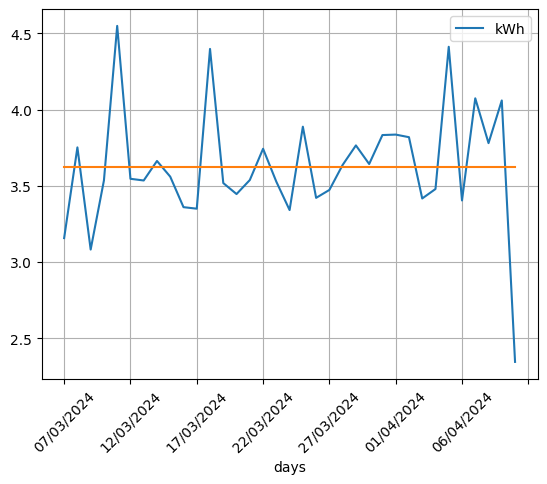

In [91]:
df_grp.plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [92]:
#manuel
#day = '11/03/2024'


In [93]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

2345

In [94]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
124541,29818,0.12,29.818,120.732443,2931569438,2024-04-10 00:00:10.438438,10/04/2024
124542,30479,0.12,30.479,118.114111,2931599917,2024-04-10 00:00:40.917438,10/04/2024
124543,34231,0.10,34.231,105.167830,2931634148,2024-04-10 00:01:15.148438,10/04/2024
124544,35979,0.10,35.979,100.058367,2931670127,2024-04-10 00:01:51.127438,10/04/2024
124545,36120,0.10,36.120,99.667774,2931706247,2024-04-10 00:02:27.247438,10/04/2024
...,...,...,...,...,...,...,...
126881,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024
126882,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024
126883,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024
126884,28486,0.13,28.486,126.377870,2993932904,2024-04-10 17:19:33.904438,10/04/2024


In [95]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [96]:
conso_day.head(1).dates, conso_day.tail(1).dates


(124541   2024-04-10 00:00:10.438438
 Name: dates, dtype: datetime64[ns],
 126885   2024-04-10 17:19:59.254438
 Name: dates, dtype: datetime64[ns])

In [97]:
conso_day.loc[:,'dates']

124541   2024-04-10 00:00:10.438438
124542   2024-04-10 00:00:40.917438
124543   2024-04-10 00:01:15.148438
124544   2024-04-10 00:01:51.127438
124545   2024-04-10 00:02:27.247438
                    ...            
126881   2024-04-10 17:17:58.024438
126882   2024-04-10 17:18:31.799438
126883   2024-04-10 17:19:05.418438
126884   2024-04-10 17:19:33.904438
126885   2024-04-10 17:19:59.254438
Name: dates, Length: 2345, dtype: datetime64[ns]

In [98]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_17660\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:10,29818,0.12,29.818,120.732443,2931569438,2024-04-10 00:00:10.438438,10/04/2024
0:0:40,30479,0.12,30.479,118.114111,2931599917,2024-04-10 00:00:40.917438,10/04/2024
0:1:15,34231,0.10,34.231,105.167830,2931634148,2024-04-10 00:01:15.148438,10/04/2024
0:1:51,35979,0.10,35.979,100.058367,2931670127,2024-04-10 00:01:51.127438,10/04/2024
0:2:27,36120,0.10,36.120,99.667774,2931706247,2024-04-10 00:02:27.247438,10/04/2024
...,...,...,...,...,...,...,...
17:17:58,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024
17:18:31,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024
17:19:5,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024


In [99]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('17:20:04', 2.345)

In [100]:
conso_jour=len(df['kWh'])

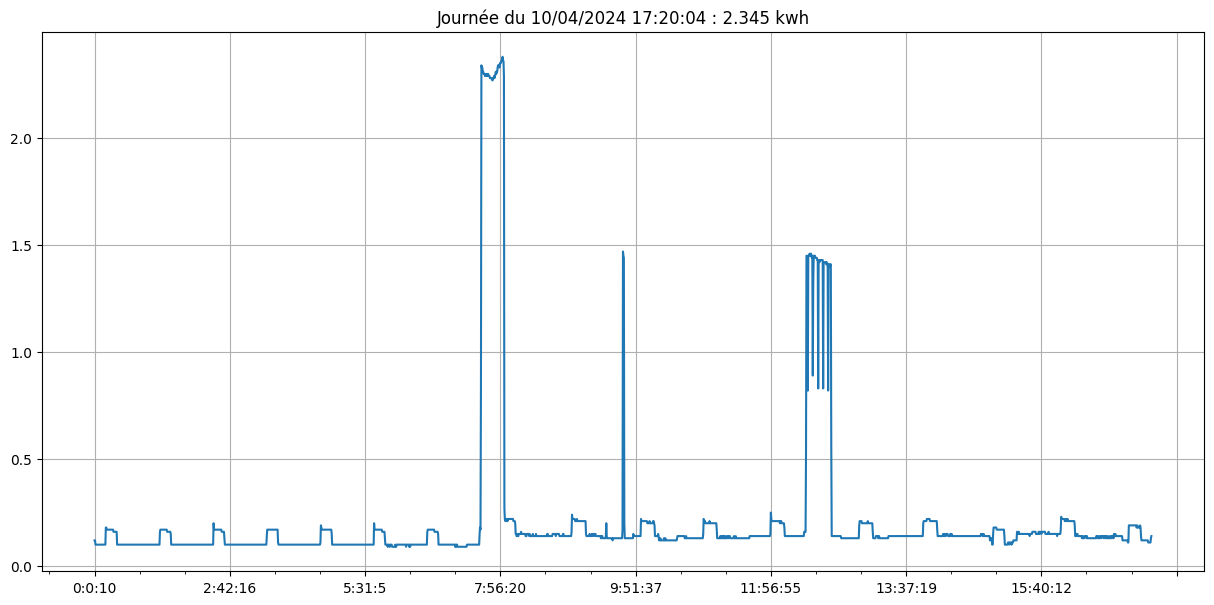

In [101]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [102]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [103]:
df['power']

heure
0:0:10      0.12
0:0:40      0.12
0:1:15      0.10
0:1:51      0.10
0:2:27      0.10
            ... 
17:17:58    0.11
17:18:31    0.11
17:19:5     0.11
17:19:33    0.13
17:19:59    0.14
Name: power, Length: 2345, dtype: float64

<Axes: xlabel='heure'>

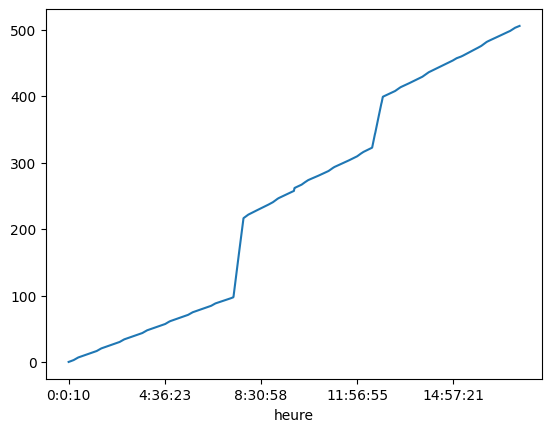

In [104]:
evo=df['power'].cumsum()
evo.plot()

112

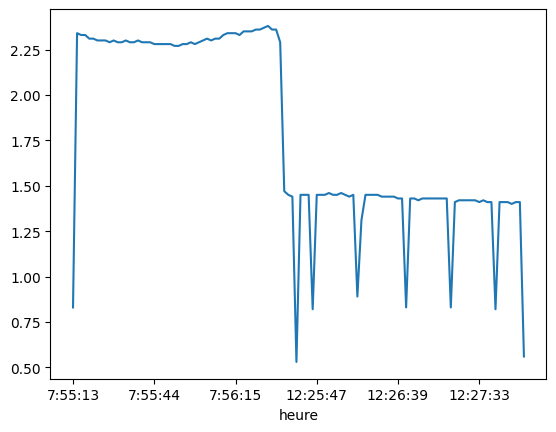

In [105]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

1547

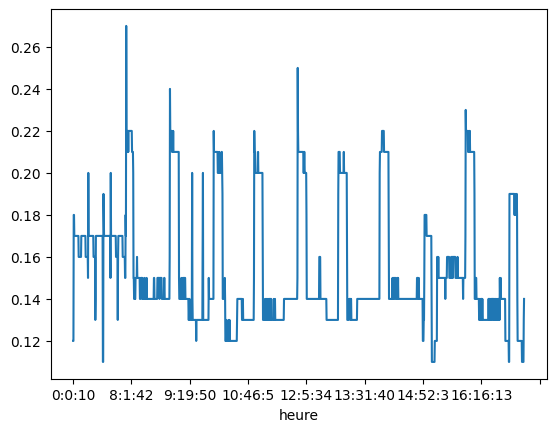

In [106]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

2233

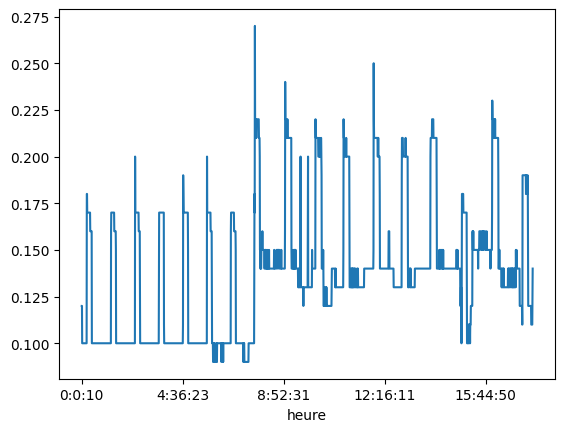

In [107]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [108]:
time = conso_data['dates']
time


0        2024-03-07 01:41:07.289438
1        2024-03-07 01:41:33.532438
2        2024-03-07 01:41:59.417438
3        2024-03-07 01:42:25.171438
4        2024-03-07 01:42:50.945438
                    ...            
126881   2024-04-10 17:17:58.024438
126882   2024-04-10 17:18:31.799438
126883   2024-04-10 17:19:05.418438
126884   2024-04-10 17:19:33.904438
126885   2024-04-10 17:19:59.254438
Name: dates, Length: 126886, dtype: datetime64[ns]

In [109]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [110]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [111]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

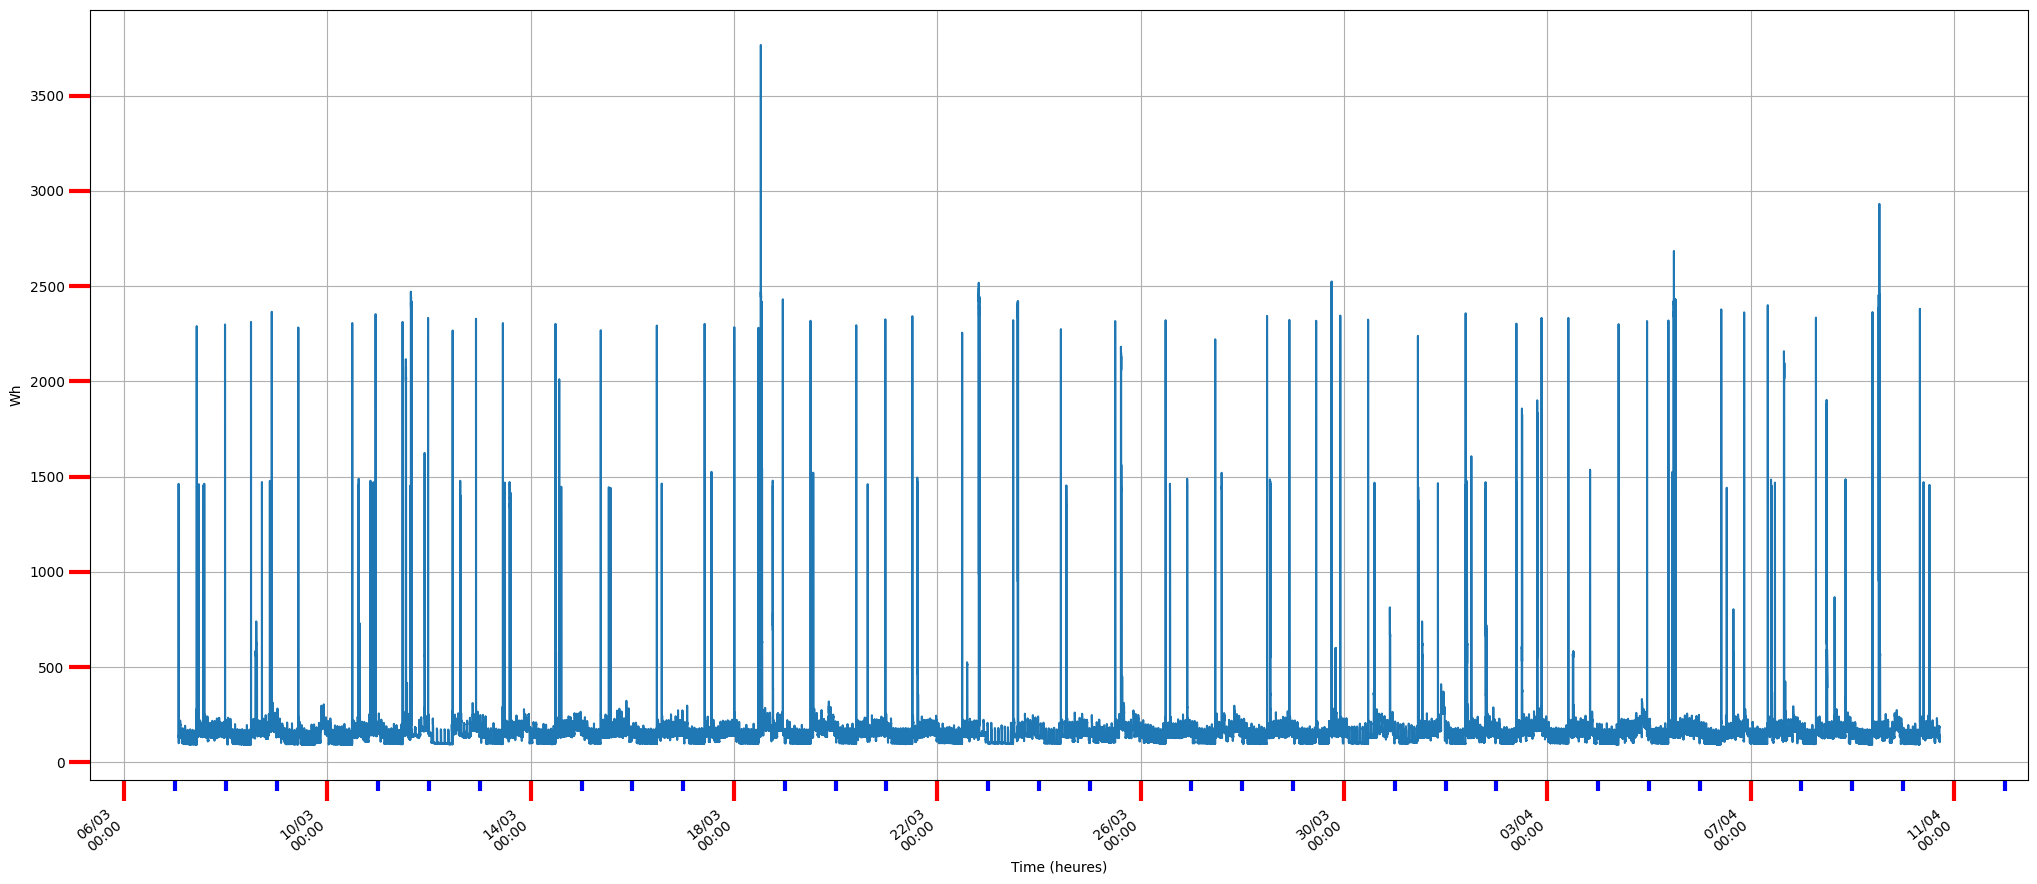

In [112]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [113]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
126885,25350,0.14,25.35,142.011834,2993958254,2024-04-10 17:19:59.254438,10/04/2024


In [114]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2993958254000

# Slice of last 1 kWh

In [115]:
l = len(conso_data)  # total watt consommés
l

126886

In [116]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(126886, 1000)

In [117]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [118]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 125886     27657  0.13  27.657  130.165962  2970736928   
 125887     27402  0.13  27.402  131.377272  2970764330   
 125888     27479  0.13  27.479  131.009134  2970791809   
 125889     27488  0.13  27.488  130.966240  2970819297   
 125890     27328  0.13  27.328  131.733021  2970846625   
 ...          ...   ...     ...         ...         ...   
 126881     33818  0.11  33.818  106.452185  2993837024   
 126882     33775  0.11  33.775  106.587713  2993870799   
 126883     33619  0.11  33.619  107.082305  2993904418   
 126884     28486  0.13  28.486  126.377870  2993932904   
 126885     25350  0.14  25.350  142.011834  2993958254   
 
                             dates        days  
 125886 2024-04-10 10:52:57.928438  10/04/2024  
 125887 2024-04-10 10:53:25.330438  10/04/2024  
 125888 2024-04-10 10:53:52.809438  10/04/2024  
 125889 2024-04-10 10:54:20.297438  10/04/2024  
 125890 2024-04-10 10:54:47.625438  10

In [119]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [120]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [121]:
cumtime_end,cumtime_start

(2993958254000, 2970764330000)

In [122]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

23193924000

In [123]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 10, 17, 20, 9, 407015),
 datetime.datetime(2024, 4, 10, 10, 53, 35, 483015),
 '10/04/2024 17:19:59')

In [124]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:41:07.289438,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:41:33.532438,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:41:59.417438,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:42:25.171438,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:42:50.945438,07/03/2024
...,...,...,...,...,...,...,...
126881,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024
126882,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024
126883,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024
126884,28486,0.13,28.486,126.377870,2993932904,2024-04-10 17:19:33.904438,10/04/2024


In [125]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('10/04/2024 10:53:25', '10/04/2024 17:19:59')

In [126]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-10 10:52:57.928438', '2024-04-10 17:19:59.254438')

In [127]:
k

1

In [128]:
data.Interval.tail(1000)

125886    27657
125887    27402
125888    27479
125889    27488
125890    27328
          ...  
126881    33818
126882    33775
126883    33619
126884    28486
126885    25350
Name: Interval, Length: 1000, dtype: int64

In [129]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.458050833333334, 3.716291590045035, 6, 27, 28)

In [130]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_17660\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [131]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
125886,27657,0.13,27.657,130.165962,2970736928,2024-04-10 10:52:57.928438,10/04/2024,2024-04-10 10:52:57.928438
125887,27402,0.13,27.402,131.377272,2970764330,2024-04-10 10:53:25.330438,10/04/2024,2024-04-10 10:53:25.330438
125888,27479,0.13,27.479,131.009134,2970791809,2024-04-10 10:53:52.809438,10/04/2024,2024-04-10 10:53:52.809438
125889,27488,0.13,27.488,130.966240,2970819297,2024-04-10 10:54:20.297438,10/04/2024,2024-04-10 10:54:20.297438
125890,27328,0.13,27.328,131.733021,2970846625,2024-04-10 10:54:47.625438,10/04/2024,2024-04-10 10:54:47.625438
...,...,...,...,...,...,...,...,...
126881,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024,2024-04-10 17:17:58.024438
126882,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024,2024-04-10 17:18:31.799438
126883,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024,2024-04-10 17:19:05.418438
126884,28486,0.13,28.486,126.377870,2993932904,2024-04-10 17:19:33.904438,10/04/2024,2024-04-10 17:19:33.904438


<Axes: >

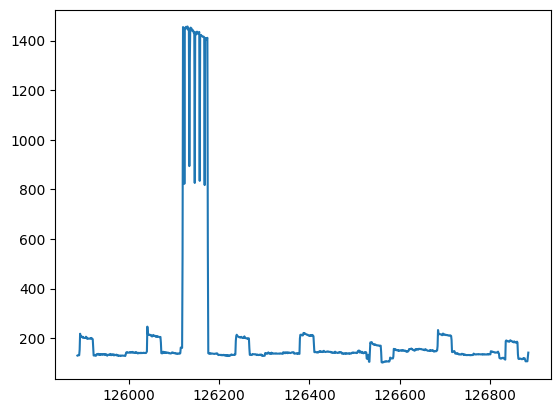

In [132]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [133]:
data['Wh']

125886    130.165962
125887    131.377272
125888    131.009134
125889    130.966240
125890    131.733021
             ...    
126881    106.452185
126882    106.587713
126883    107.082305
126884    126.377870
126885    142.011834
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

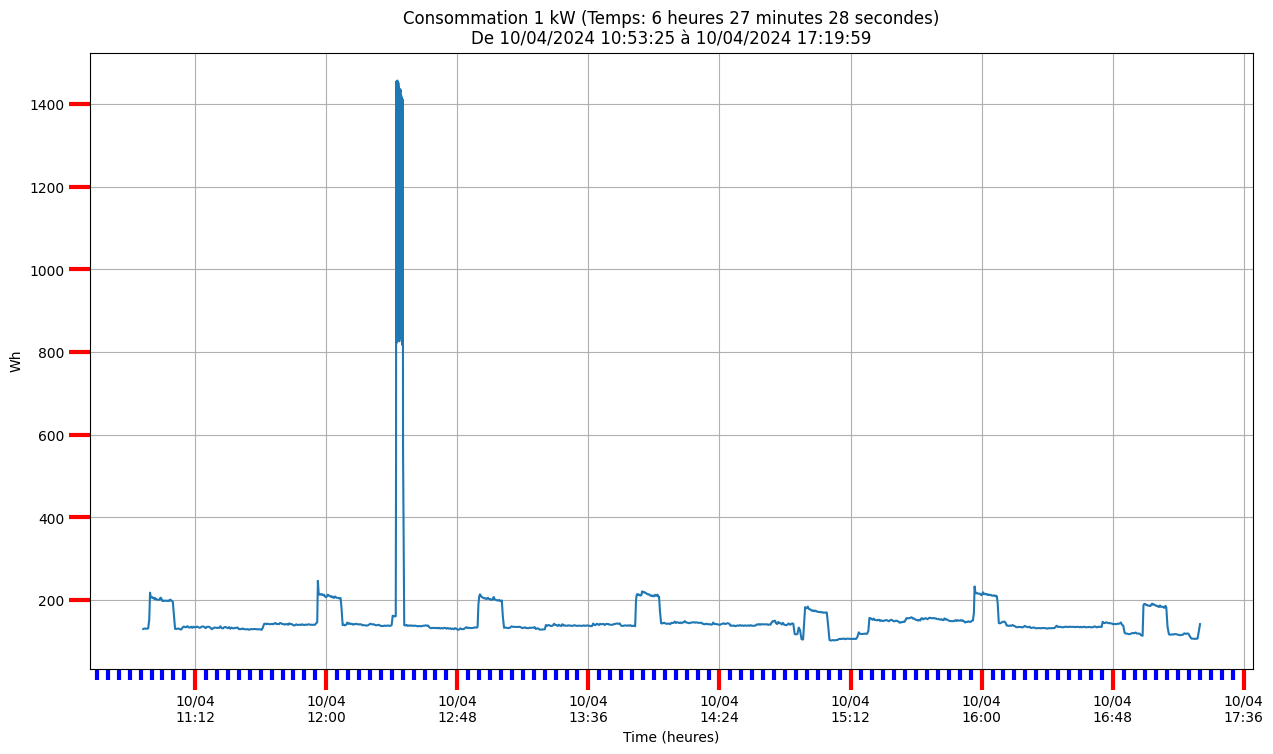

In [134]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

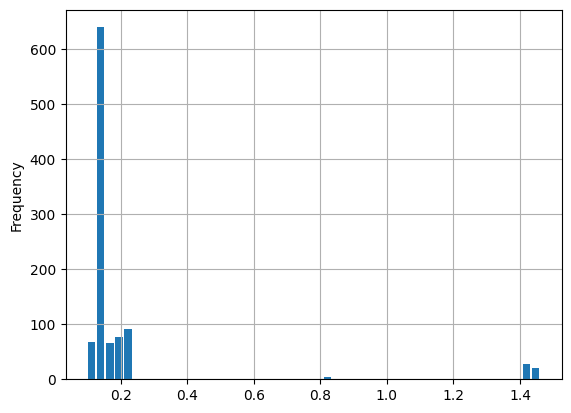

In [135]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [136]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
126881,33818,0.11,33.818,106.452185,2993837024,2024-04-10 17:17:58.024438,10/04/2024
126882,33775,0.11,33.775,106.587713,2993870799,2024-04-10 17:18:31.799438,10/04/2024
126883,33619,0.11,33.619,107.082305,2993904418,2024-04-10 17:19:05.418438,10/04/2024
126884,28486,0.13,28.486,126.377870,2993932904,2024-04-10 17:19:33.904438,10/04/2024
126885,25350,0.14,25.350,142.011834,2993958254,2024-04-10 17:19:59.254438,10/04/2024


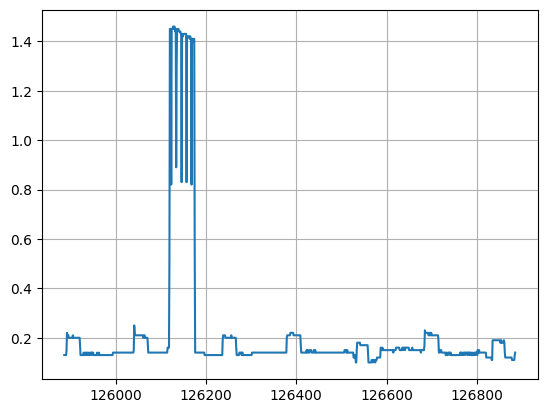

In [137]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [138]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(2993958254000.0, 49899.304233333336)

In [139]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 10, 17, 20, 12, 721173),
 datetime.datetime(2024, 3, 7, 1, 40, 54, 467173))

In [140]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(126886, 2993959, 831.6552777777778)

In [141]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [142]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [143]:
732/12 # 60 jours

61.0

In [144]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

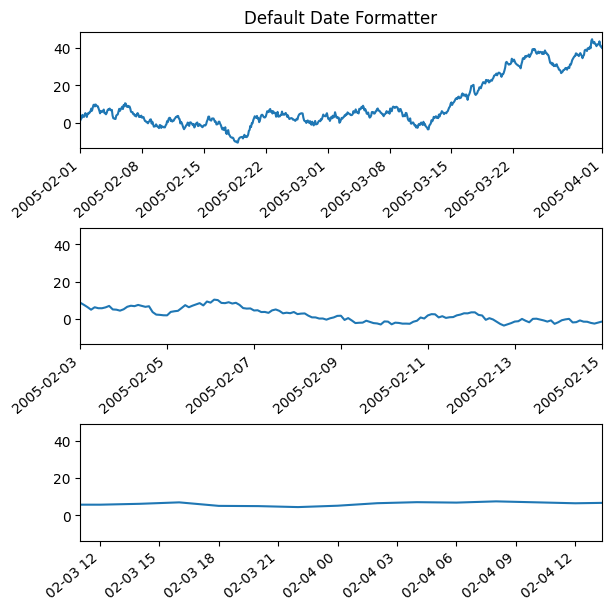

In [145]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [146]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)